# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [1]:
#Your code here
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [2]:
path = r"C:\Users\ASUS\OneDrive\Desktop\desktop folders\TECH\LS\ML\code\week 3\CNN Assignment\Dataset"
data = tf.keras.preprocessing.image_dataset_from_directory(path, labels = 'inferred', label_mode = 'int', batch_size = 32, image_size = (256, 256))  #Your code here

Found 1673 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [3]:
data_iterator=data.as_numpy_iterator()

In [4]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

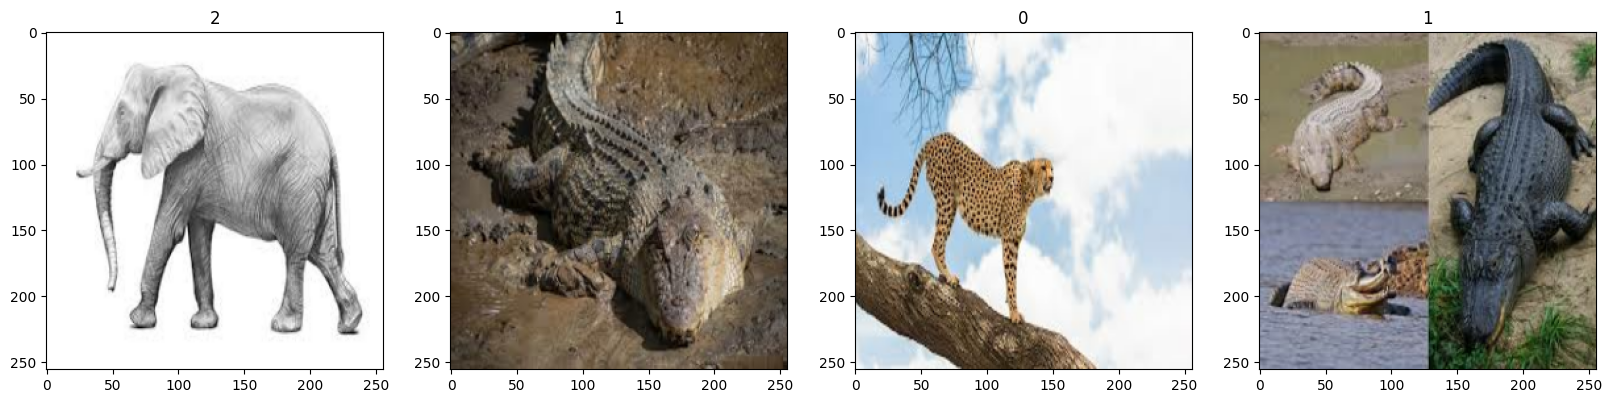

In [5]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [6]:
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# data=data.map(lambda a, b : a / 255)   # Your code here)
data = data.map(normalize_img)

# Run only this cell once, otherwise error arises as we normalize data twice.

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [7]:
#Your code here

train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data.take(train_size)
# test_data = data.skip(train_size).take(test_size)
test_data = data.skip(train_size)

print(f"Train size: {len(train_data)} batches")
print(f"Test size: {len(test_data)} batches")

Train size: 42 batches
Test size: 11 batches


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [8]:
#Your code here

model = Sequential([
    # layer 1
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3)),
    MaxPooling2D(pool_size = (2, 2)),
    
    # layer 2
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),

    # layer 3
    Conv2D(128, (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),

    Flatten(),

    # Dense layer
    Dense(128, activation = 'relu'),

    # output
    Dense(4, activation = 'softmax')
])

model.summary()

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,839,492 (56.61 MB)

 Trainable params: 14,839,492 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

**Q.6** Compile your model

In [9]:
#Your code here)

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [10]:
#Your code here)

model.fit(train_data, epochs = 10, validation_data = test_data, verbose = 1)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.2656 - loss: 2.5677 - val_accuracy: 0.4802 - val_loss: 1.2431
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4949 - loss: 1.1864 - val_accuracy: 0.5897 - val_loss: 0.9915
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6401 - loss: 0.9276 - val_accuracy: 0.7386 - val_loss: 0.7039
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7845 - loss: 0.5806 - val_accuracy: 0.7903 - val_loss: 0.5828
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9044 - loss: 0.3220 - val_accuracy: 0.8267 - val_loss: 0.5272
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9548 - loss: 0.1502 - val_accuracy: 0.8632 - val_loss: 0.4537
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9768 - loss: 0.0789 - val_accuracy: 0.7994 - val_loss: 0.7529
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9646 - loss: 0.1162 - val_accuracy: 0.8663 - val_loss:

**Q.8** Test your code with test set

In [11]:
#Your code here)

loss,accuracy=model.evaluate(test_data)
print(f'Test accuracy : {accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.8886 - loss: 0.5272
Test accuracy : 0.8784194588661194


In [12]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8784194588661194


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**